# Análisis de Egresos Hospitalarios

En este análisis se quiere ver la cantidad de egresos hospitalarios para diversos problemas
médicos, tanto cubiertos por GES y los no GES.

Las preguntas que se quieren responder con este análisis son:

- Cuántos casos del problema médico hubieron en cada año a nivel nacional?
- En qué región fué dónde hubo el mayor caso de estos problemas médicos?
- Cómo es la distribución etárea del problema médico?
- Cómo es la distribución por sexo del problema médico?
- Cómo es la distribución por tipo de previsión (FONASA e ISAPRE) del problema médico?
- Cómo es la distribución por sector público/privado del problema de salud?
- Cómo es la distribución por hospitales del problemad de salud?


Ahora, a nivel de Instituto Nacional del Tórax:

- Cuál es la cantidad de Egresos Hospitalarios del problema de salud en el Tórax? Cuánto es este 
porcentaje de la cantidad Nacional? Cómo se compara el porcentaje del Tórax con respecto a 
los otros Hospitales (Somos referencia?)
- Cuál es el grupo etáreo que mayoritariamente llega al Tórax?
- De cuántas procedencias llegan pacientes al Hospital del Tórax?


In [1]:
import importlib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import funciones_auxiliares as aux
import funciones_auxiliares_hito_2 as aux2

sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

importlib.reload(aux2)
importlib.reload(aux)

<module 'funciones_auxiliares' from 'c:\\Users\\finanzas\\Desktop\\Javier Rojas\\Javier\\trabajo\\SSMO\\EPH\\modulo_gestion\\1.analisis_problemas_de_salud\\egresos-hospitalarios\\funciones_auxiliares.py'>

# Carga de Archivos Nacionales y Obtención de Subgrupo Tórax

In [2]:
AGRUPACION_DIAGNOSTICOS = ['Capítulo', 'Sección', 'Categoría', 'Descripción', 'DIAG1']

In [3]:
dfs = aux.leer_anios_egresos()
df_completa = pd.concat(dfs.values())
GLOSA_TORAX = 'Instituto Nacional de Enfermedades Respiratorias y Cirugía Torácica'
df_torax = df_completa.query('GLOSA_ESTABLECIMIENTO_SALUD == @GLOSA_TORAX')

c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:53: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', encoding='latin-1', on_bad_lines='skip')
c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:53: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', encoding='latin-1', on_bad_lines='skip')
c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:53: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', 

# Unión de DataFrames con Diccionario de CIEs

In [4]:
cie = aux.obtener_diccionario_cie()
completa_con_cie = pd.merge(df_completa, cie, how='left', left_on='DIAG1', right_on='CodigoSinPunto')
torax_con_cie = pd.merge(df_torax, cie, how='left', left_on='DIAG1', right_on='CodigoSinPunto')

# Analisis de Ranking del Torax

En este apartado se quiere responder la pregunta:

- Dentro del Tórax:
    - ¿Cuáles son los diagnósticos, Capítulos, etc... que son más frecuentes?
    - ¿Cuáles son los diagnósticos, Capítulos , etc... que tienen la mayor cantidad de Dias de Estada?
    - ¿Cuáles son los diagnósticos, Capítulos, etc... que son más frecuentes y tienen la mayor cantidad de Dias de Estada?

Para este análisis es sólo necesario obtener los años, conteo y dias estada de cada agrupación.

In [37]:
torax_frec_estada_tiempo = torax_con_cie.groupby(by=['ANO_EGRESO'] + AGRUPACION_DIAGNOSTICOS).agg(
                           {'DIAS_ESTADA': [np.count_nonzero, np.sum]}).reset_index()

torax_frec_estada_tiempo.columns = torax_frec_estada_tiempo.columns.map('|'.join).str.strip('|')
torax_frec_estada_tiempo['EgresosXDIAS_ESTADA'] = torax_frec_estada_tiempo['DIAS_ESTADA|count_nonzero'] * torax_frec_estada_tiempo['DIAS_ESTADA|sum']
torax_frec_estada_tiempo = torax_frec_estada_tiempo.rename(columns={'DIAS_ESTADA|count_nonzero': 'N_EGRESOS'})

torax_frec_estada_tiempo.to_csv('output/ranking_torax/ranking_frec_estada_tiempo.csv', 
                                encoding='latin-1', sep=';')

# Análisis a lo largo del tiempo de Egresos

## Nacional

,ANO_EGRESO
2013,1676936
2015,1671054
2018,1669602
2014,1660150
2016,1637265
2017,1637150
2019,1636508


,ANO_EGRESO
count,7.000000e+00
mean,1.655524e+06
std,1.803630e+04
min,1.636508e+06
25%,1.637208e+06
50%,1.660150e+06
75%,1.670328e+06
max,1.676936e+06


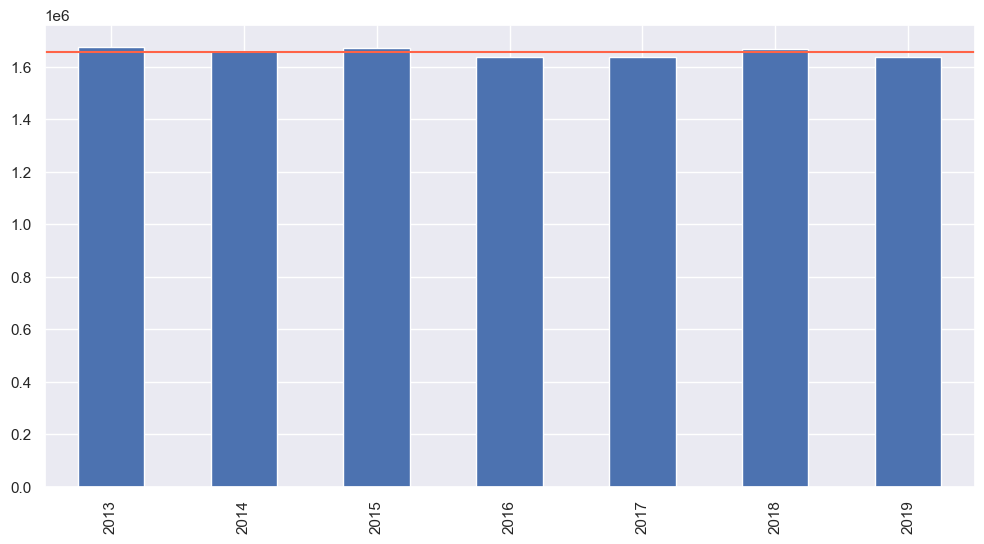

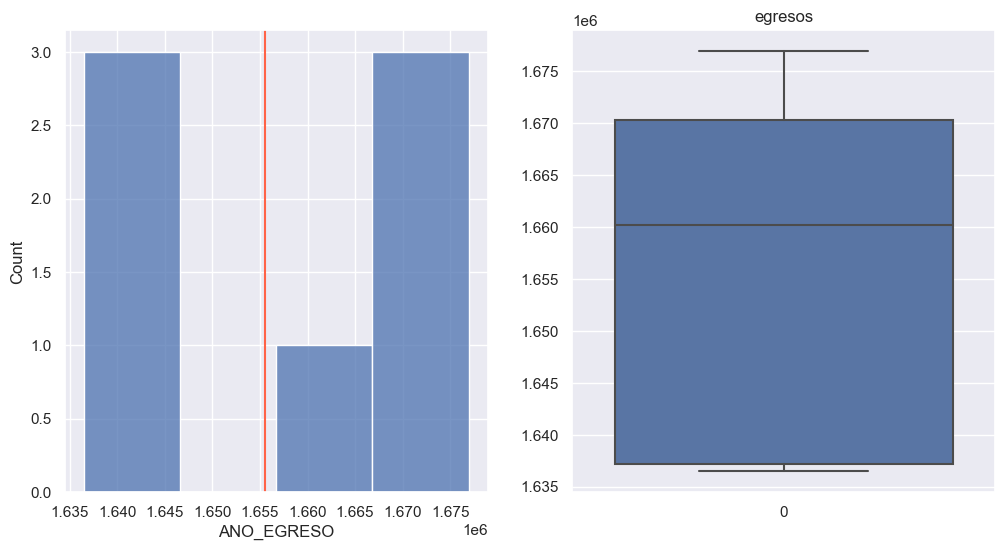

In [21]:
aux.analizar_conteo_de_variable(df_completa, 'ANO_EGRESO')

**De estos resultados se puede ver que la cantidad de Egresos a lo largo del país se mantiene constante
entre 2013 a 2019.**

- 2013 fue el año con la mayor cantidad de egresos, con **1.676.936 egresos**
- 2019 fue el año con la menor cantidad de egresos, con **1.636.508 egresos**

- La media de egresos fueron **1.655.524 egresos**
- Hay **ausencia de valores atípicos** entre los años 2013 y 2019. Por lo tanto, en años normales (sin pandemia), es esperable que se mantenga esta tendencia y cantidad de egresos hospitalarios. 
- Hay **ausencia de una tendencia a la baja o a la subida** de egresos hospitalarios.

## Tórax

,ANO_EGRESO
2018,5482
2019,5435
2017,4901
2016,4872
2015,4621
2013,4435
2014,4409


,ANO_EGRESO
count,7.000000
mean,4879.285714
std,439.294402
min,4409.000000
25%,4528.000000
50%,4872.000000
75%,5168.000000
max,5482.000000


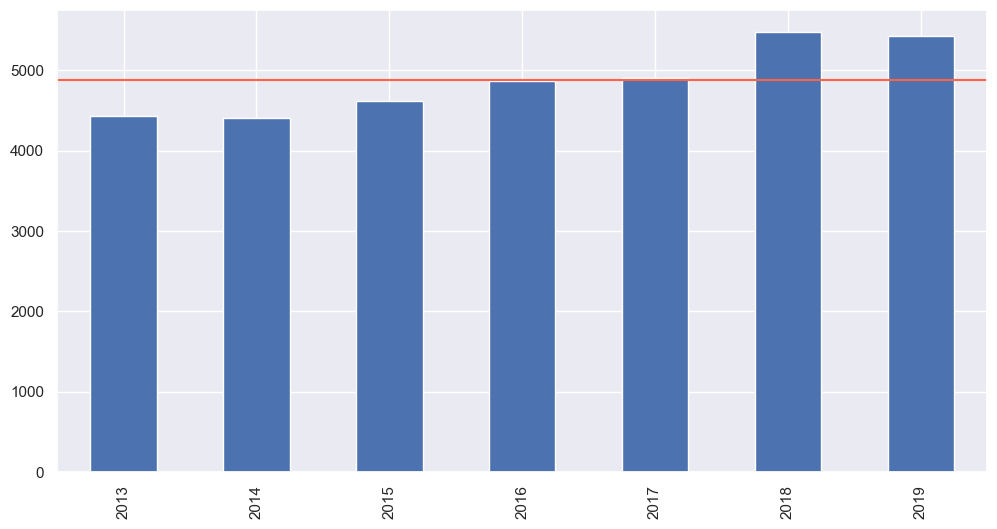

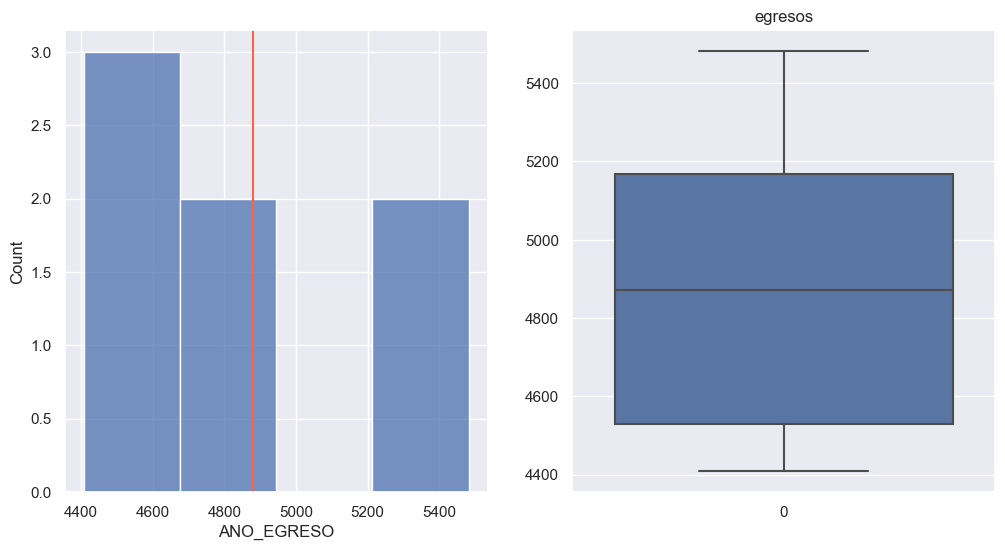

In [22]:
aux.analizar_conteo_de_variable(df_torax, 'ANO_EGRESO')

**De estos resultados se puede ver que la cantidad de Egresos en el Tórax tiende al alza a lo largo
de los años**

- 2018 fue el año con la mayor cantidad de egresos, con **5482 egresos**
- 2014 fue el año con la menor cantidad de egresos, con **4409 egresos**

- La media de egresos fueron **4879**
- Hay **ausencia de valores atípicos** entre los años 2013 y 2019.

## Privado - Publico

CANTIDAD  \
ANO_EGRESO PERTENENCIA_ESTABLECIMIENTO_SALUD                              
2013       Pertenecientes al Sistema Nacional de Servicios...   1084018   
           No Pertenecientes al Sistema Nacional de Servic...    592918   
2014       Pertenecientes al Sistema Nacional de Servicios...   1073508   
           No Pertenecientes al Sistema Nacional de Servic...    586642   
2015       Pertenecientes al Sistema Nacional de Servicios...   1066715   
           No Pertenecientes al Sistema Nacional de Servic...    604339   
2016       Pertenecientes al Sistema Nacional de Servicios...   1031950   
           No Pertenecientes al Sistema Nacional de Servic...    605315   
2017       Pertenecientes al Sistema Nacional de Servicios...   1040368   
           No Pertenecientes al Sistema Nacional de Servic...    596782   
2018       Pertenecientes al Sistema Nacional de Servicios...   1060992   
           No Pertenecientes al Sistema Nacional de Servic...    608610   
2019       Pertenecientes al Sistema Nacional de Servicios...   1034114   
           No Pertenecientes al Sistema Nacional de Servic...    602394   

                                                               PORCENTAJE  
ANO_EGRESO PERTENENCIA_ESTABLECIMIENTO_SALUD                               
2013       Pertenecientes al Sistema Nacional de Servicios...    0.646428  
           No Pertenecientes al Sistema Nacional de Servic...    0.353572  
2014       Pertenecientes al Sistema Nacional de Servicios...    0.646633  
           No Pertenecientes al Sistema Nacional de Servic...    0.353367  
2015       Pertenecientes al Sistema Nacional de Servicios...    0.638349  
           No Pertenecientes al Sistema Nacional de Servic...    0.361651  
2016       Pertenecientes al Sistema Nacional de Servicios...    0.630289  
           No Pertenecientes al Sistema Nacional de Servic...    0.369711  
2017       Pertenecientes al Sistema Nacional de Servicios...    0.635475  
           No Pertenecientes al Sistema Nacional de Servic...    0.364525  
2018       Pertenecientes al Sistema Nacional de Servicios...    0.635476  
           No Pertenecientes al Sistema Nacional de Servic...    0.364524  
2019       Pertenecientes al Sistema Nacional de Servicios...    0.631903  
           No Pertenecientes al Sistema Nacional de Servic...    0.368097

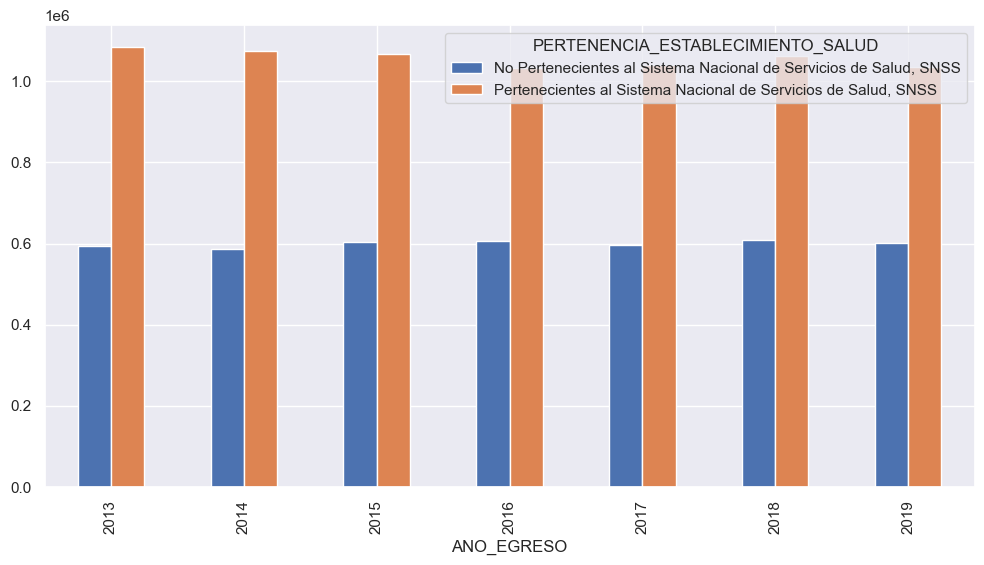

El resumen de Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS es:



,CANTIDAD,PORCENTAJE
count,7.000000e+00,7.000000
mean,1.055952e+06,0.637793
std,2.054675e+04,0.006516
min,1.031950e+06,0.630289
25%,1.037241e+06,0.633689
50%,1.060992e+06,0.635476
75%,1.070112e+06,0.642388
max,1.084018e+06,0.646633


El resumen de No Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS es:



,CANTIDAD,PORCENTAJE
count,7.000000,7.000000
mean,599571.428571,0.362207
std,7795.299649,0.006516
min,586642.000000,0.353367
25%,594850.000000,0.357612
50%,602394.000000,0.364524
75%,604827.000000,0.366311
max,608610.000000,0.369711


In [40]:
juntas = aux.analisis_variable_en_el_tiempo(df_completa, 'PERTENENCIA_ESTABLECIMIENTO_SALUD')

- A lo largo de los años, se puede ver una tendencia constante en la cantidad de casos de egresos
que van hacia el sector privado y público.

- El **sector público tuvo una media de egresos de 1.055.952** pacientes entre 2013 y 2019. El **porcentaje
promedio** de pacientes que van al sector público es del **63.8%**
- El **sector privado tuvo una media de egresos de 599.571** pacientes entre 2013 y 2019. El **porcentaje
promedio** de pacientes que van al sector público es del **36.2%**

# Análisis por Diagnóstico

Aquí se quiere ver la cantidad de diagnósticos que hizo el Tórax a lo largo de los años, y ver
cuántos corresponden a cardiaco, respiratorio, etc (Según las grandes causas)

In [111]:
analisis_ranking = torax_con_cie.groupby(by=['ANO_EGRESO', 'Capítulo', 'Sección', 'Categoría'])[['DIAG1', 'GLOSA_DIAG1']].value_counts()
analisis_ranking = analisis_ranking.reset_index()
analisis_ranking.to_csv('prueba.csv', encoding='latin-1', sep=';')

# Analisis Procedimientos Quirurgicos

- Se quiere ver que diagnosticos con intervenciones quirurgicas son los mas frecuentes
- Se quiere ver cuantas intervenciones quirurgicas se han hecho a lo largo del tiempo en el Torax

## Cuantos procedimientos Quirúrgicos se han hecho a lo largo del tiempo?

CANTIDAD  PORCENTAJE
ANO_EGRESO INTERV_Q                      
2013       2             3272    0.737768
           1             1163    0.262232
2014       2             3307    0.750057
           1             1102    0.249943
2015       2             3426    0.741398
           1             1195    0.258602
2016       2             3576    0.733990
           1             1296    0.266010
2017       2             3564    0.727199
           1             1337    0.272801
2018       2             4082    0.744619
           1             1400    0.255381
2019       2             4147    0.763017
           1             1288    0.236983

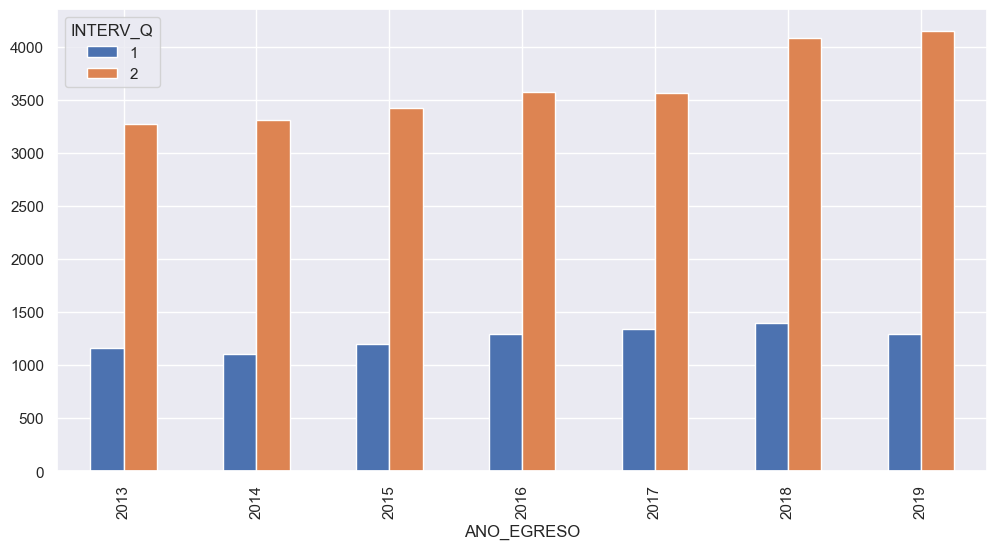

El resumen de 2 es:



,CANTIDAD,PORCENTAJE
count,7.000000,7.000000
mean,3624.857143,0.742578
std,354.210121,0.011638
min,3272.000000,0.727199
25%,3366.500000,0.735879
50%,3564.000000,0.741398
75%,3829.000000,0.747338
max,4147.000000,0.763017


El resumen de 1 es:



,CANTIDAD,PORCENTAJE
count,7.000000,7.000000
mean,1254.428571,0.257422
std,104.872712,0.011638
min,1102.000000,0.236983
25%,1179.000000,0.252662
50%,1288.000000,0.258602
75%,1316.500000,0.264121
max,1400.000000,0.272801


In [103]:
quir_torax = aux.analisis_grafico_anidado_por_anio(torax_con_cie, 'INTERV_Q')

Al observar los porcentajes de **Intervenciones Quirúrgicas y Sin Intervenciones Quirúrgicas del Hospital del Tórax**,
se puede ver que los valores se mantienen dentro de valores constantes:

- Las intervenciones quirúrgicas entre 2013 y 2019 corresponden al 25.7% de todos los egresos
del Hospital del Tórax
- Los egresos hospitalarios sin intervenciones quirúrgicas entre 2013 y 2019 corresponden al
74.3%.

Sin embargo, entre 2017 y 2019 se puede ver una baja del 2% en cada año en la cantidad de intervenciones
quirúrgicas. Por lo tanto, es importante discernir si esta baja se mantendrá en el tiempo, o corresponde
a una variación aleatoria.

CANTIDAD  PORCENTAJE
ANO_EGRESO INTERV_Q                      
2013       2           925863    0.552116
           1           751073    0.447884
2014       2           911577    0.549093
           1           748573    0.450907
2015       2           894283    0.535161
           1           776771    0.464839
2016       2           868618    0.530530
           1           768647    0.469470
2017       2           846157    0.516848
           1           790993    0.483152
2018       2           918125    0.549907
           1           751477    0.450093
2019       2           912114    0.557354
           1           724394    0.442646

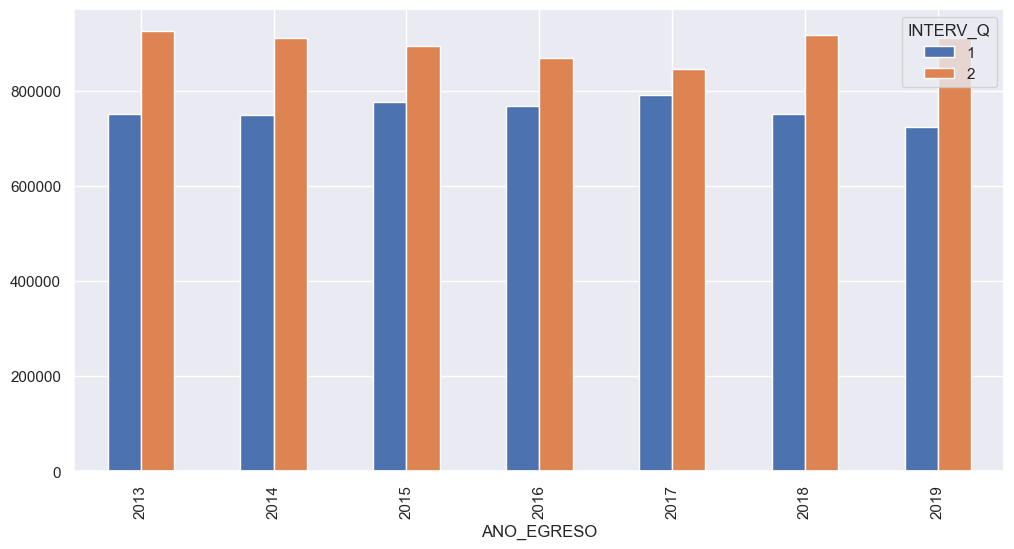

El resumen de 2 es:



,CANTIDAD,PORCENTAJE
count,7.000000,7.000000
mean,896676.714286,0.541573
std,29204.621168,0.014495
min,846157.000000,0.516848
25%,881450.500000,0.532845
50%,911577.000000,0.549093
75%,915119.500000,0.551011
max,925863.000000,0.557354


El resumen de 1 es:



,CANTIDAD,PORCENTAJE
count,7.000000,7.000000
mean,758846.857143,0.458427
std,21825.029030,0.014495
min,724394.000000,0.442646
25%,749823.000000,0.448989
50%,751477.000000,0.450907
75%,772709.000000,0.467155
max,790993.000000,0.483152


In [102]:
inter_q_pais = aux.analisis_grafico_anidado_por_anio(df_completa, 'INTERV_Q')

Al ver la situacion pais, se puede ver que la cantidad de Intervenciones Quirurgicas y No Quirurgicas
tienden a valores mas cercanos entre si:

- Las Intervenciones No Quirurgicas tienen en promedio 896677 casos entre 2013 y 2019. Esto corresponde
al 54.2% de todos los egresos hospitalarios en ese periodo
- Las Intervenciones Quirurgicas tienen en promedio 758847 casos entre 2013 y 2019. Esto corresponde
al 45.8% de todos los egresos hospitalarios en ese periodo
- Entre 2017 y 2019 se puede observar una baja en la cantidad de egresos con Intervenciones Quirurgicas

Por lo tanto, al contrastar la cantidad de Intervenciones Quirúrgicas entre el País y el Hospital
del Tórax, se puede ver lo siguiente:

- El Hospital del Tórax presenta una menor cantidad de Intervenciones Quirúrgicas con respecto
al País (25.7% y 45.8% respectivamente)
- Tanto a Nivel País, como a Nivel Tórax existe una tendencia a la baja de la cantida de Intervenciones
Quirúrgicas desde el año 2017.

# Análisis de Egresos con Interv. Quir

In [105]:
torax_interv_quir = torax_con_cie.query('INTERV_Q == 1')

In [109]:
analisis_ranking = torax_con_cie.groupby(by=['ANO_EGRESO', 'Capítulo', 'Sección', 'Categoría'])[['DIAG1', 'GLOSA_DIAG1']].value_counts()
analisis_ranking = analisis_ranking.reset_index()
analisis_ranking.to_csv('ranking_interv_q_torax.csv', encoding='latin-1', sep=';')

# Ranking Tórax

In [29]:
def obtener_diagnosticos_hospital(agrupacion, glosa):
    tmp = agrupacion.copy()

    tmp = tmp.reset_index()
    tmp.columns = ['_'.join(col).strip('_') for col in tmp.columns]
    diagnosticos_hospital = tmp.query('GLOSA_ESTABLECIMIENTO_SALUD == @glosa')

    return diagnosticos_hospital['DIAG1'].unique()


In [30]:
global_nacional_no_intq = completa_con_cie.groupby(['GLOSA_ESTABLECIMIENTO_SALUD'] + AGRUPACION_DIAGNOSTICOS) \
                                          .agg({'TIPO_EDAD': sum,
                                                'DIAS_ESTADA': [sum, np.mean]}
                                                )

In [32]:
diagnosticos_relevantes = obtener_diagnosticos_hospital(global_nacional_no_intq, GLOSA_TORAX)

In [36]:
ranking_diagnosticos_relevantes = global_nacional_no_intq[global_nacional_no_intq.index
                                                          .get_level_values('DIAG1')
                                                          .isin(diagnosticos_relevantes)]


In [52]:
ranking_diagnosticos_relevantes.sort_values(['DIAG1', ('TIPO_EDAD', 'sum')], ascending=False)

TIPO_EDAD  \
                                                                                                                                                                                                                                                                           sum   
GLOSA_ESTABLECIMIENTO_SALUD                        Capítulo                                           Sección                                            Categoría                                          Descripción                                        DIAG1             
Instituto Nacional de Enfermedades Respiratoria... Cap.21  FACTORES QUE INFLUYEN EN EL ESTADO DE S... Z77-Z99  PERSONAS CON RIESGOS POTENCIALES DE SA... Z99 DEPENDENCIA DE MÁQUINAS Y DISPOSITIVOS CAPA... Dependencia de otras máquinas y dispositivos ca... Z998          1   
Clínica Las Lilas                                  Cap.21  FACTORES QUE INFLUYEN EN EL ESTADO DE S... Z77-Z99  PERSONAS CON RIESGOS POTENCIALES DE SA... Z98 OTROS ESTADOS POSTQUIRÚRGICOS                  Otros estados postquirúrgicos especificados        Z988        224   
Hospital Santo Tomás (Limache)                     Cap.21  FACTORES QUE INFLUYEN EN EL ESTADO DE S... Z77-Z99  PERSONAS CON RIESGOS POTENCIALES DE SA... Z98 OTROS ESTADOS POSTQUIRÚRGICOS                  Otros estados postquirúrgicos especificados        Z988         98   
Clínica Hospital del Profesor                      Cap.21  FACTORES QUE INFLUYEN EN EL ESTADO DE S... Z77-Z99  PERSONAS CON RIESGOS POTENCIALES DE SA... Z98 OTROS ESTADOS POSTQUIRÚRGICOS                  Otros estados postquirúrgicos especificados        Z988         79   
Hospital Dr. Oscar Hernández E.(Curacautín)        Cap.21  FACTORES QUE INFLUYEN EN EL ESTADO DE S... Z77-Z99  PERSONAS CON RIESGOS POTENCIALES DE SA... Z98 OTROS ESTADOS POSTQUIRÚRGICOS                  Otros estados postquirúrgicos especificados        Z988         63   
...                                                                                                                                                                                                                                                                        ...   
Hospital de Puerto Octay                           Cap.01  CIERTAS ENFERMEDADES INFECCIOSAS Y PARA... A00-A09  ENFERMEDADES INFECCIOSAS INTESTINALES     A04 OTRAS INFECCIONES INTESTINALES BACTERIANAS     Enterocolitis debida a Clostridium difficile       A047          1   
Hospital de Santa Bárbara                          Cap.01  CIERTAS ENFERMEDADES INFECCIOSAS Y PARA... A00-A09  ENFERMEDADES INFECCIOSAS INTESTINALES     A04 OTRAS INFECCIONES INTESTINALES BACTERIANAS     Enterocolitis debida a Clostridium difficile       A047          1   
Hospital de Til Til                                Cap.01  CIERTAS ENFERMEDADES INFECCIOSAS Y PARA... A00-A09  ENFERMEDADES INFECCIOSAS INTESTINALES     A04 OTRAS INFECCIONES INTESTINALES BACTERIANAS     Enterocolitis debida a Clostridium difficile       A047          1   
Hospital de Yumbel                                 Cap.01  CIERTAS ENFERMEDADES INFECCIOSAS Y PARA... A00-A09  ENFERMEDADES INFECCIOSAS INTESTINALES     A04 OTRAS INFECCIONES INTESTINALES BACTERIANAS     Enterocolitis debida a Clostridium difficile       A047          1   
Mutual de Seguridad CChC Estación Central          Cap.01  CIERTAS ENFERMEDADES INFECCIOSAS Y PARA... A00-A09  ENFERMEDADES INFECCIOSAS INTESTINALES     A04 OTRAS INFECCIONES INTESTINALES BACTERIANAS     Enterocolitis debida a Clostridium difficile       A047          1   

                                                                                                                                                                                                                                                                     DIAS_ESTADA  \
                                                                                                                                                    

In [50]:
ranking_diagnosticos_relevantes

TIPO_EDAD  \
                                                                                                                                                                                                                                                                           sum   
GLOSA_ESTABLECIMIENTO_SALUD                        Capítulo                                           Sección                                            Categoría                                          Descripción                                        DIAG1             
Centro CONIN Chillán                               Cap.10  ENFERMEDADES DEL APARATO RESPIRATORIO (... J40-J47  ENFERMEDADES CRÓNICAS DEL TRACTO RESPI... J45 ASMA                                           Asma, no especificada                              J459          2   
Centro CONIN Concepción                            Cap.04  ENFERMEDADES ENDOCRINAS, NUTRICIONALES ... E70-E88  ALTERACIONES METABÓLICAS                  E84 FIBROSIS QUÍSTICA                              Fibrosis quística con manifestaciones pulmonares   E840          4   
                                                   Cap.06  ENFERMEDADES DEL SISTEMA NERVIOSO (G00-... G40-G47  TRASTORNOS EPISÓDICOS Y PAROXÍSTICOS      G40 EPILEPSIA                                      Epilepsia, tipo no especificado                    G409          4   
                                                   Cap.09  ENFERMEDADES DEL APARATO CIRCULATORIO (... I30-I52  OTRAS FORMAS DE ENFERMEDAD CARDIACA       I35 TRASTORNOS DE VÁLVULA AÓRTICA NO REUMÁTICOS    Estenosis (de la válvula) aórtica con insuficie... I352          1   
                                                                                                                                                         I44 BLOQUEO AURICULOVENTRICULAR Y DE RAMA IZQUI... Bloqueo auriculoventricular de segundo grado       I441          1   
...                                                                                                                                                                                                                                                                        ...   
Pensionado San José                                Cap.05  TRASTORNOS MENTALES Y DE COMPORTAMIENTO... F40-F48  TRASTORNO DE ANSIEDAD, DISOCIATIVO, RE... F41 OTROS TRASTORNOS DE ANSIEDAD                   Trastorno de pánico [ansiedad paroxística episó... F410          5   
                                                                                                                                                         F43 REACCIÓN AL ESTRÉS GRAVE Y TRASTORNOS DE AD... Trastornos de adaptación                           F432         50   
                                                                                                                                                         F44 TRASTORNOS DISOCIATIVOS [DE CONVERSIÓN]        Trastornos disociativos mixtos [y de conversión]   F447          1   
Servicios Clínicos Neuropsiquiátricos y Geriátr... Cap.05  TRASTORNOS MENTALES Y DE COMPORTAMIENTO... F10-F19  TRASTORNOS MENTALES Y DEL COMPORTAMIEN... F10 TRASTORNOS MENTALES Y DEL COMPORTAMIENTO DE... Trastornos mentales y del comportamiento debido... F101          1   
                                                   Cap.06  ENFERMEDADES DEL SISTEMA NERVIOSO (G00-... G40-G47  TRASTORNOS EPISÓDICOS Y PAROXÍSTICOS      G40 EPILEPSIA                                      Epilepsia, tipo no especificado                    G409          1   

                                                                                                                                                                                                                                                                     DIAS_ESTADA  \
                                                                                                                                                    